# Lab 4 Report
Qinchen Lin

In [16]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import xarray as xr

#this sets the size of the plot to something useful
#plt.rcParams["figure.figsize"] = (20,15)

In [17]:
hf = h5py.File('gammaray_lab4.h5', 'r')
hf.keys()
data = np.array(hf.get('data'))
#data[:,0]
hf.close()
time = data[0,:]
solarphase = data[1,:]
earthlongitude = data[2,:]
counts = data[3,:]
print(len(time))

25920001


Starts at the earth longitdute of 45.0 degree
Ends at the earth longitude of 45.0 degree
Maximum earth longitude is 359.9933333317458 degree
minimum earth longitude is 0.0 degree
Counting starts at 943272016.0 GPS seconds
Counting ends at 940680016.0 GPS seconds
327040


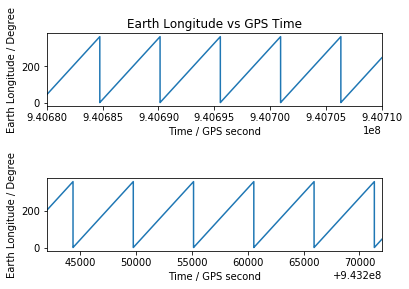

In [18]:
# 1
# First, I'm trying figure out how the statellite moves 

fig2 = plt.figure(2)
fig2.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('Earth Longitude vs GPS Time')
plt.plot(time, earthlongitude)
plt.xlim(time[0], time[300000])
plt.xlabel('Time / GPS second')
plt.ylabel('Earth Longitude / Degree')
plt.subplot(2,1,2)
plt.plot(time, earthlongitude)
plt.xlim(time[len(time)-300000], time[len(time)-1])
plt.xlabel('Time / GPS second')
plt.ylabel('Earth Longitude / Degree')
print('Starts at the earth longitdute of', earthlongitude[0], 'degree')
print('Ends at the earth longitude of', earthlongitude[len(earthlongitude)-1], 'degree')
print('Maximum earth longitude is', max(earthlongitude),'degree')
print('minimum earth longitude is' , min(earthlongitude),'degree')
print('Counting starts at', time[len(time)-1], 'GPS seconds')
print('Counting ends at', time[0], 'GPS seconds')

print(len(np.unique(earthlongitude)))


From graphs above, the data contains the path of the statellite that starts at the longitude of 45 and then keep looping (0 to 360 then back to 0). We can also tell that the speed is a constant.

In [19]:
# Next, trying to find the number of elements in each cycles and the total cycles
data_eachcycle = len(earthlongitude[earthlongitude == 0])
cycles = len(earthlongitude) / data_eachcycle
print('Number of data in each cycle is', data_eachcycle)
print('Number of total cycles is', cycles)

Number of data in each cycle is 480
Number of total cycles is 54000.00208333333


<function matplotlib.pyplot.show(*args, **kw)>

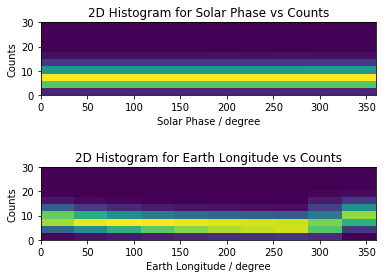

In [20]:
# Now, I'm tring to see if the solar phase or earth longitude have any effects on the background distribution

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.title('2D Histogram for Solar Phase vs Counts')
plt.xlabel('Solar Phase / degree')
plt.ylabel('Counts')
plt.hist2d(solarphase, counts)
plt.subplot(2,1,2)
plt.title('2D Histogram for Earth Longitude vs Counts')
plt.xlabel('Earth Longitude / degree')
plt.ylabel('Counts')
plt.hist2d(earthlongitude, counts)
plt.show

# Discussion

Because the background is the cosmic rays, the distribution should follow poisson distribution ideally. 

As we can tell from the graphs, the background distribuditon doesn't change a low as the solar phase changes, while the earth longitude has much more effects on the background. What should be noted is that around 220 to 280 degree, signal contamination can be obserbed since the range of brightest color extends.

In order to build background pdfs, I plans to take the average ray counts at each earth longitude and then use those values as lambda to build the poisson distribution pdfs. 

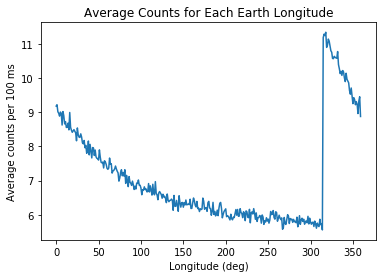

7.089283947408948

In [21]:
# 2

means = [np.mean(counts[earthlongitude==i]) for i in np.arange(360)]
plt.plot(np.arange(360), means)
plt.title('Average Counts for Each Earth Longitude')
plt.xlabel("Longitude (deg)")
plt.ylabel("Average counts per 100 ms")
plt.show()
np.mean(means)

3
This is the plot for one cycle. when time is envolved it will be just periodic funtion. It looks like a log function

In [22]:
# 4
# Here I chose the maximum mean, the minimum mean and the average mean
five_sigma = stats.norm.sf(5)
five_counts_5 = int(stats.poisson.isf(five_sigma, 5.56))
five_counts_7 = int(stats.poisson.isf(five_sigma, 7.09))
five_counts_11 = int(stats.poisson.isf(five_sigma, 11.18))
print('For the mean of 5.56 counts/100 ms, a 5 sigma threshold value is' ,five_counts_5, 'count/100 ms')
print('For the mean of 7.09 counts/100 ms, a 5 sigma threshold value is' ,five_counts_7, 'counts/100 ms')
print('For the mean of 11.18 counts/100 ms, a 5 sigma threshold value is', five_counts_11, 'counts/100 ms')

For the mean of 5.56 counts/100 ms, a 5 sigma threshold value is 21 count/100 ms
For the mean of 7.09 counts/100 ms, a 5 sigma threshold value is 24 counts/100 ms
For the mean of 11.18 counts/100 ms, a 5 sigma threshold value is 31 counts/100 ms


# Problem 2

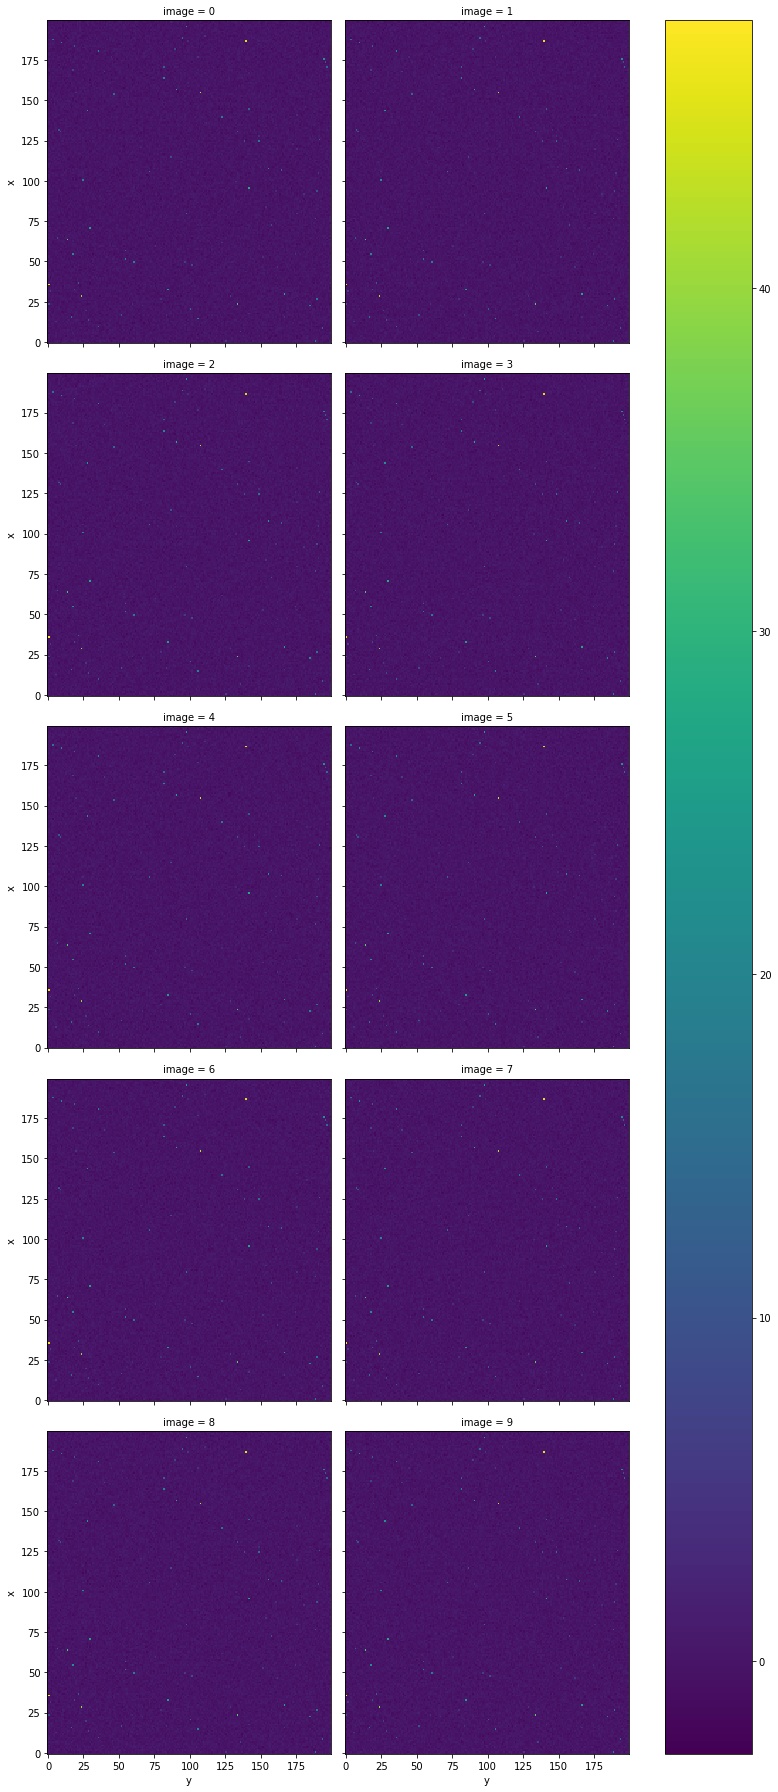

In [5]:
# 2
# Here I chose to find the faintest star

hf5 = h5py.File('images.h5', 'r')
stack = xr.DataArray(hf5.get('imagestack')[:,:,:], coords=[np.arange(200), np.arange(200),np.arange(10)], 
                     dims=['x', 'y', 'image']).transpose('image','x','y')
stack.plot(center=False, col='image', col_wrap=2, size=5)
plt.show()

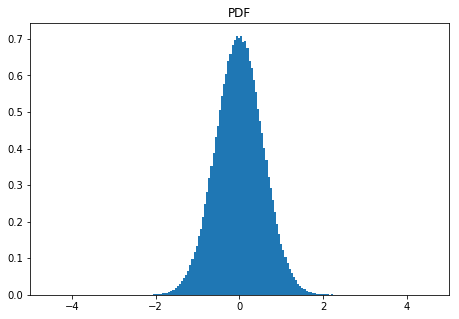

In [6]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("PDF")
plt.xlim([-5,5])
plt.show()

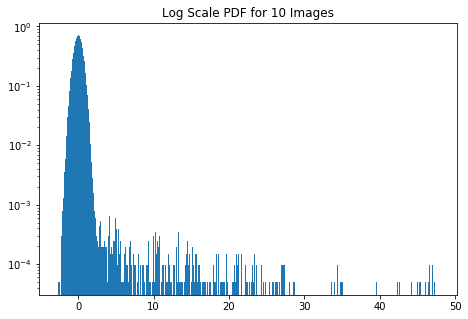

In [7]:
stack.plot.hist(bins=1000, density=True, size=5)
plt.title("Log Scale PDF for 10 Images")
plt.yscale("log")
plt.show()

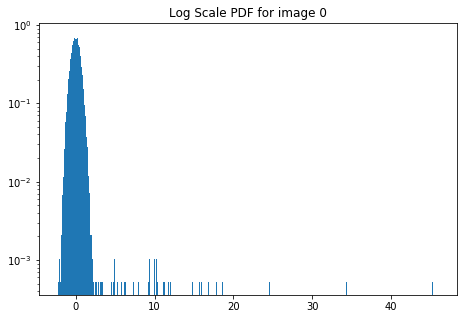

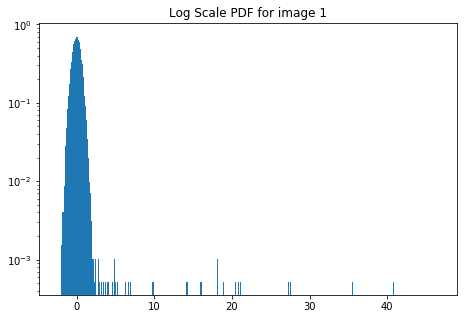

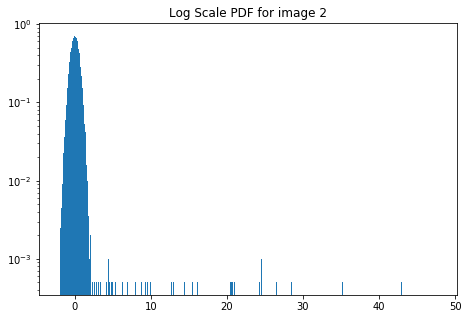

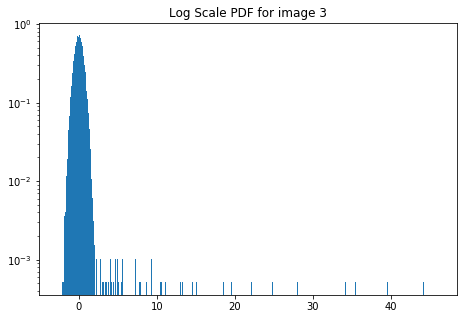

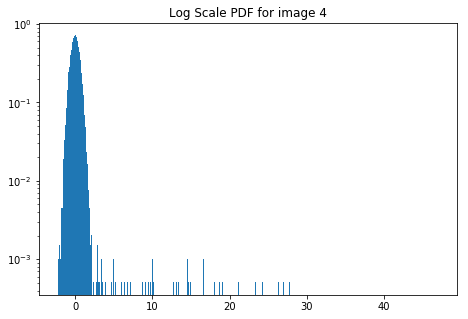

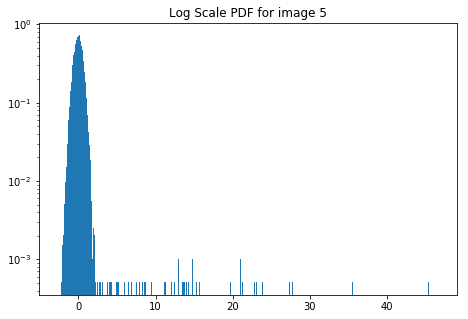

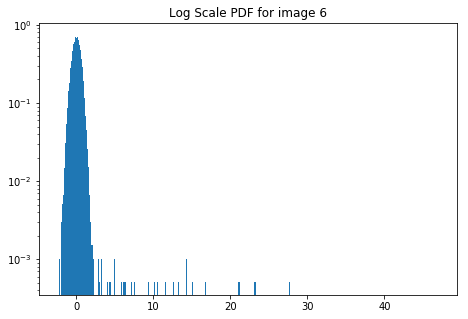

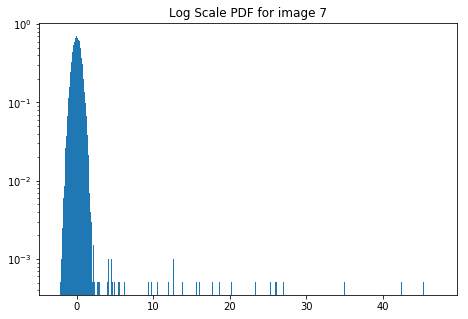

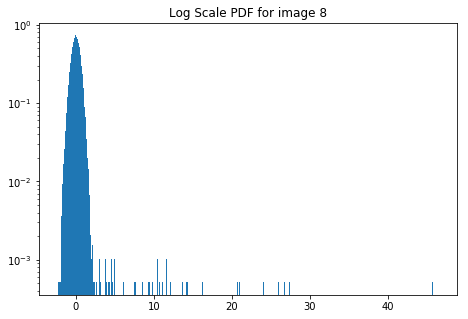

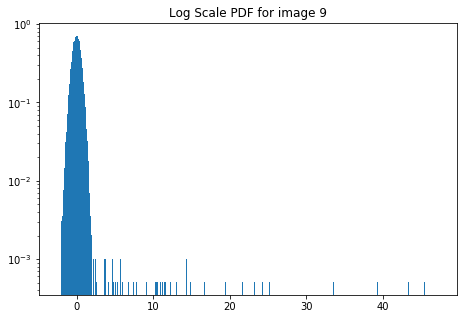

In [8]:
for i in np.arange(10):
    stack[i].plot.hist(bins=1000, density=True, size=5)
    plt.title(f"Log Scale PDF for image {i}")
    plt.yscale("log")
    plt.show()

In [23]:
for i in np.arange(10):
    print(f"max value for image {i}: {np.max(stack[i].values)}")
print(f"mean value for image {i}: {np.mean(stack[i].values)}")

max value for image 0: 46.01175269422071
max value for image 1: 46.592267064916705
max value for image 2: 47.79010819628649
max value for image 3: 46.081120603006916
max value for image 4: 47.0003865702652
max value for image 5: 46.621316029297525
max value for image 6: 46.99131843066182
max value for image 7: 47.26324939630629
max value for image 8: 46.4883943499121
max value for image 9: 47.21296880302628
mean value for image 9: 0.03580179806386976


Those values stands for the intensity for the brightest pixel, and in image 2 the intensity is the maximum

In [11]:
trimmed_stack = stack.where(stack < 3)
mean = trimmed_stack.mean().values
std = trimmed_stack.std().values
print(f"This estimated background distribution is a Gaussian with a mean of {mean:.3f} and a standard deviation of {std:.3f}")

This estimated background distribution is a Gaussian with a mean of 0.001 and a standard deviation of 0.563


In [14]:
img_5sig = stats.norm.isf(five_sigma, loc=mean, scale=std)
print(f"A detection of at least {img_5sig:.2f} would be a 5 sigma event")
for i in np.arange(10):
    n = stack[i].where(stack[i] > img_5sig).count().values
    print(f"Number of 5 sigma events for image {i}: {n}")

A detection of at least 2.82 would be a 5 sigma event
Number of 5 sigma events for image 0: 101
Number of 5 sigma events for image 1: 101
Number of 5 sigma events for image 2: 101
Number of 5 sigma events for image 3: 99
Number of 5 sigma events for image 4: 99
Number of 5 sigma events for image 5: 98
Number of 5 sigma events for image 6: 101
Number of 5 sigma events for image 7: 96
Number of 5 sigma events for image 8: 98
Number of 5 sigma events for image 9: 101
